In [2]:
%matplotlib widget

from superwake_recording import RecordingLoader
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import pandas as pd

import standard_plotter as std_plt

In [3]:
#file = "/Users/williamkemp/Records/Repositories/CREATeV_power/data/june15_2022.BIN"
#recording = RecordingLoader.load("CREATeV_2022_2", file)
#df = recording.resample("1s")
#recording.reader.print_available_columns()

df_1Hz = pd.read_pickle("./data/june15_2022_1Hz.pkl")
df = df_1Hz

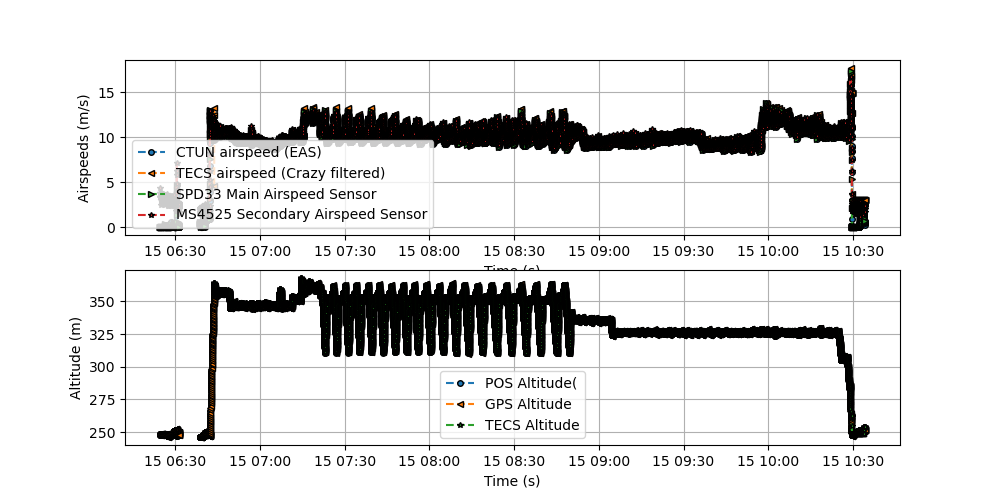

In [4]:
## Making figure with all airspeeds

plt.figure(figsize=(10,5))
ax0 = plt.subplot(2,1,1)
plt.plot(df["Airspeed_CTUN"], label="CTUN airspeed (EAS)", linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df["Airspeed_TECS"], label="TECS airspeed (Crazy filtered)", linestyle='--', marker='<', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df["Airspeed_Sensor0"], label="SPD33 Main Airspeed Sensor", linestyle='--', marker='>', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df["Airspeed_Sensor1"], label="MS4525 Secondary Airspeed Sensor", linestyle='--', marker='*', markersize=4, markeredgecolor=[0,0,0])
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Airspeeds (m/s)")
plt.grid(True)

ax1 = plt.subplot(2,1,2, sharex=ax0)
plt.plot(df["Altitude_POS"], label="POS Altitude(", linestyle='--', marker='o', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df["Altitude_GPS"], label="GPS Altitude", linestyle='--', marker='<', markersize=4, markeredgecolor=[0,0,0])
#plt.plot(df["Altitude_Origin"], label="Origin Altitude", linestyle='--', marker='>', markersize=4, markeredgecolor=[0,0,0])
plt.plot(df["Altitude_TECS"]+df["Altitude_Origin"], label="TECS Altitude", linestyle='--', marker='*', markersize=4, markeredgecolor=[0,0,0])
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Altitude (m)")
plt.grid(True)
plt.show()

In [34]:
## Mapping plots
# Gives more information on hovering over 

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name=df.index, 
                        #hover_data=["Address", "Listed"],
                        color="Altitude_POS",
                        color_continuous_scale=color_scale,
                        #size="Listed",
                        zoom=15, 
                        height=800,
                        width=1200)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
#  Figures for ROC

#  Figures for Pitch and AoA

#  Figures for Wind Speed

In [5]:
corrM = df.corr()
fig = px.imshow(corrM)
fig.update_layout(width=1200, height=1200)
fig.show()

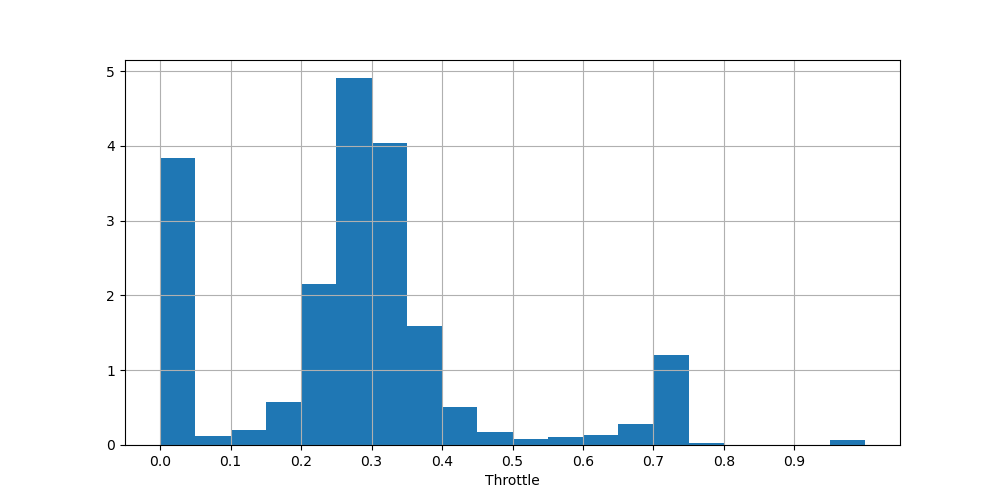

[3.84170681e+00 1.21128699e-01 2.03716449e-01 5.69855471e-01
 2.15141087e+00 4.90433586e+00 4.03303510e+00 1.58568479e+00
 5.10667584e-01 1.76187199e-01 7.84583620e-02 1.00481762e-01
 1.37646249e-01 2.86304198e-01 1.19752237e+00 3.16586373e-02
 1.37646249e-03 0.00000000e+00 1.37646249e-03 6.74466621e-02]
[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65
 0.7  0.75 0.8  0.85 0.9  0.95 1.  ]


In [6]:
position = df.loc[:, 'Latitude':'Longitude']
fig2 = px.line_mapbox(df, lat='Latitude', lon='Longitude')
fig2.show()

fig4 = px.line(df["EscPower"])
fig4.show()

fig5 = px.line(df["Altitude"])
fig5.show()

fig6 = px.line(df["Throttle"])
fig6.show()

plt.figure(figsize=(10, 5))
plt.grid()
#x = np.linspace(0,1,100)
#plt.hist(x, bins=20, density=True)
n, bins, patches = plt.hist((df["Throttle"]-1100)*(1.0/800.0), bins=20, density=True)
plt.xticks(np.arange(0, 1, step=0.1))
plt.xlabel("Throttle")
plt.show()

print(n)
print(bins)

0.40   -0.271740
0.99    0.750032
0.60   -0.177233
Name: Airspeed_Error, dtype: float64


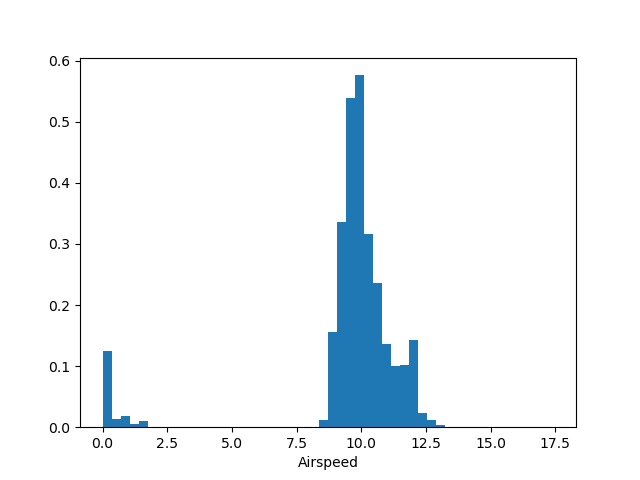

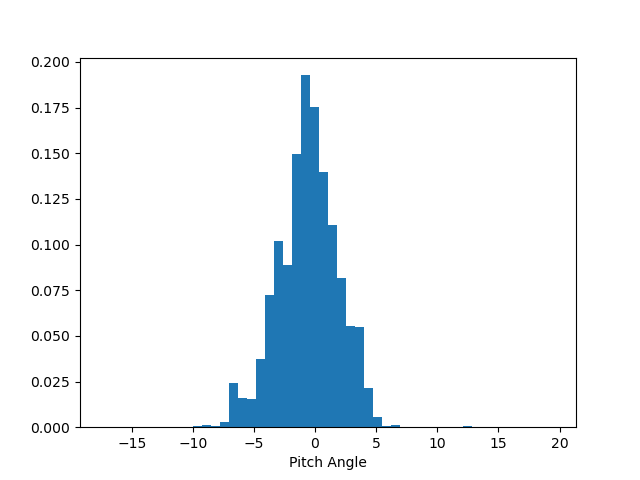

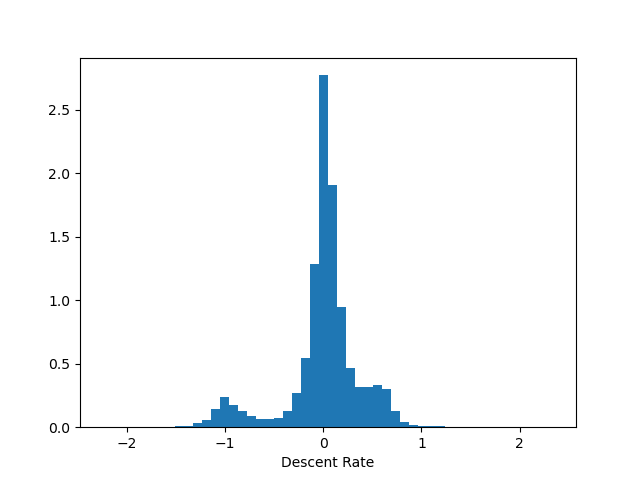

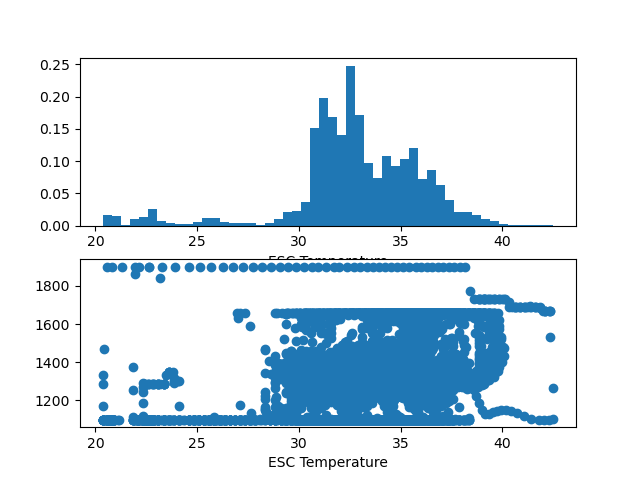

In [9]:
df["Airspeed_Error"].describe()

# Getting Quantiles
quantile = df["Airspeed_Error"].quantile([0.4, 0.99, 0.6])
print(quantile)

fig = px.line(df["Airspeed_Error"])
fig.show()

plt.figure()
plt.hist(df["Airspeed"], density=True, bins=50)
plt.xlabel("Airspeed")
plt.show()

plt.figure()
plt.hist(df["PitchAngle"], density=True, bins=50)
plt.xlabel("Pitch Angle")
plt.show()

plt.figure()
plt.hist(df["DescentRate"], density=True, bins=50)
plt.xlabel("Descent Rate")
plt.show()

plt.figure()
ax1 = plt.subplot(2,1,1)
plt.hist(df["EscTemperature"], density=True, bins=50)
plt.xlabel("ESC Temperature")

ax2 = plt.subplot(2,1,2, sharex=ax1)
plt.scatter(df["EscTemperature"], df["Throttle"])
plt.xlabel("ESC Temperature")
plt.show()

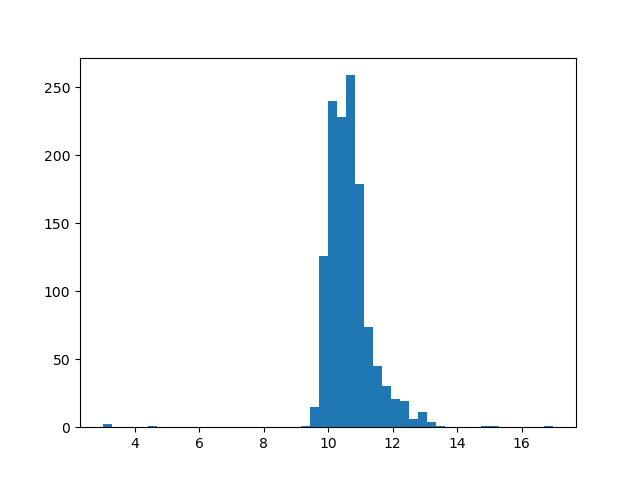

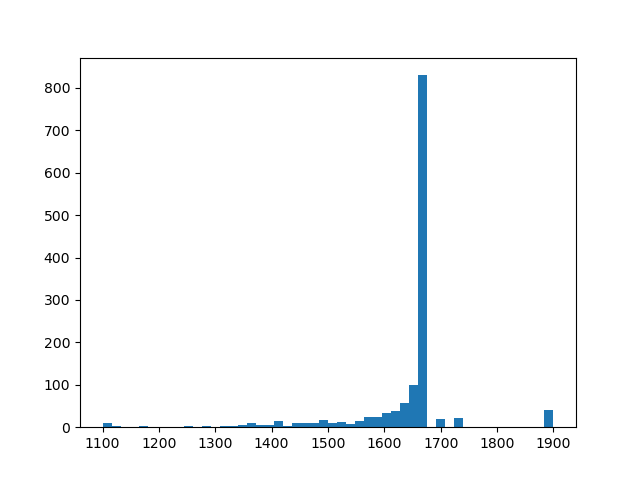

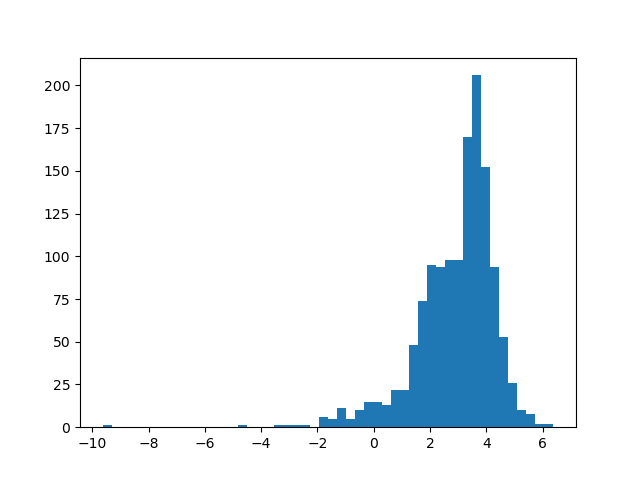

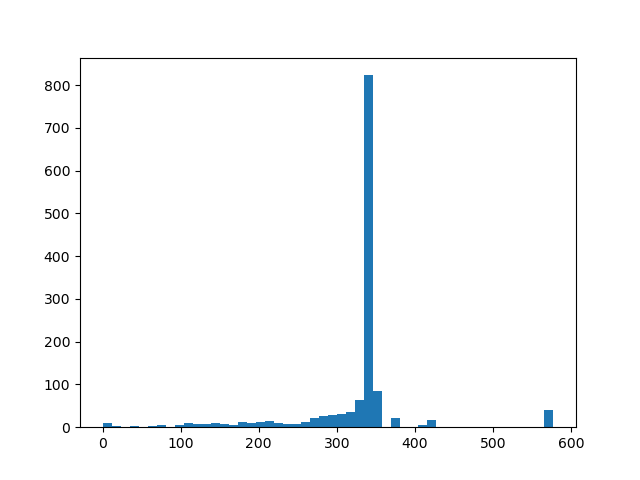

In [10]:
# What happens to the data when descent rate is less than -0.5 m/s?  
# Airspeed, throttle, pitch

df_descent = df[df["DescentRate"] < -0.5]

plt.figure()
plt.hist(df_descent["Airspeed_TECS"], bins=50)
plt.show()

plt.figure()
plt.hist(df_descent["Throttle"], bins=50)
plt.show()

plt.figure()
plt.hist(df_descent["PitchAngle"], bins=50)
plt.show()

plt.figure()
plt.hist(df_descent["EscPower"], bins=50)
plt.show()